In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time

%matplotlib inline

### Pattern Matching Threshold Analysis

In [2]:
def pattern_matching(img, template, method, show_img = False):
    
    h, w = template.shape
    img2 = img.copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
        score = min_val
    else:
        location = max_loc
        score = max_val
    
    if show_img:
        bottom_right = (location[0] + w, location[1] + h)    
        cv2.rectangle(img2, location, bottom_right, 255, 5)
        plt.imshow(img2)
        
    return img2, location, score

In [3]:
# Read in greyscale mode
img = cv2.imread('img/whole_img_2.png', 0)
img_o = cv2.imread('img/other_img.png', 0)
img_b = cv2.imread('img/whole_img_bn.png', 0)

template = cv2.imread('img/countdown_new.png', 0)
template_resized = cv2.resize(template, (0,0), fx = 0.5, fy = 0.5)

template_bn = cv2.imread('img/combat.png', 0)
template_bn_resized = cv2.resize(template_bn, (0,0), fx = 0.5, fy = 0.5)

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

1.0

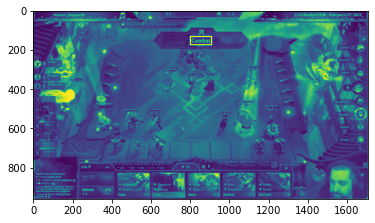

In [168]:
matched_img, location, score = pattern_matching(img_b, template_bn, methods[1], True)
score

0.8939361572265625

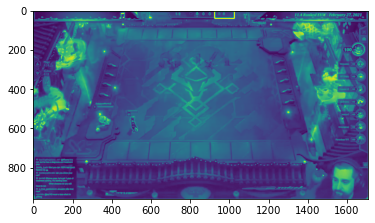

In [185]:
matched_img, location, score = pattern_matching(img, template, methods[1], True)
score

0.5489937663078308

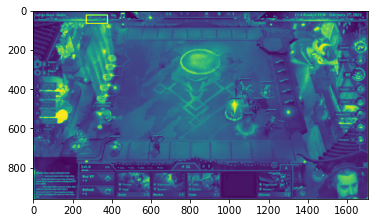

In [166]:
matched_img, location, score = pattern_matching(img_o, template, methods[1], True)
score

### Video Reading by Frames

Riot UI changed after April 15. 
*New* pattern matching technique needed.

In [255]:
cap = cv2.VideoCapture('contents/Big Bad Doggo - The Ultimate BIS Warwick  TFT Neon Nights  Teamfight Tactics.mp4')

In [256]:
# Get fps for frame skipping
fps = cap.get(cv2.CAP_PROP_FPS)

In [234]:
tic = time.perf_counter() # Time the code

count, skip_frames = 0, fps
combat_flag = False
combat_timestamp = 0
while cap.isOpened():
    ret,frame = cap.read()
    
    if ret:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Match combat banner
        if not combat_flag:
            matched_img, location, score = pattern_matching(frame_gray, template_bn_resized, methods[1], False)
            if score > 0.90:
                combat_flag = True 
                combat_timestamp = count
                print(f"flag found at {combat_timestamp/fps} seconds")
        
        # Start looking for essential frame within 3s of founding the combat_timestamp
        elif combat_flag and count < combat_timestamp + fps * 10:
            matched_img, location, score = pattern_matching(frame_gray, template_resized, methods[1], False)
            if score > 0.88:
                cv2.imwrite("img/9/frame%d.jpg" % count, frame)
                combat_flag = False
                print(f"screen captured at {count/fps} seconds")
                count += fps * 9 # Forward 10s to avoid miss capturing 
        else:
            combat_flag = False # Reset the flag if out of bound

        count += skip_frames # This advances one second @ fps
        cap.set(cv2.CAP_PROP_POS_FRAMES, count)
    else:
        cap.release()
        break
        
toc = time.perf_counter()
print(f"Finished the video in {toc - tic:0.4f} seconds")

flag found at 50.0 seconds
screen captured at 55.0 seconds
flag found at 99.0 seconds
screen captured at 103.0 seconds
flag found at 141.0 seconds
screen captured at 146.0 seconds
flag found at 193.0 seconds
screen captured at 198.0 seconds
flag found at 257.0 seconds
screen captured at 261.0 seconds
flag found at 321.0 seconds
screen captured at 326.0 seconds
flag found at 427.0 seconds
screen captured at 432.0 seconds
flag found at 506.0 seconds
screen captured at 510.0 seconds
flag found at 571.0 seconds
screen captured at 575.0 seconds
flag found at 630.0 seconds
screen captured at 634.0 seconds
flag found at 697.0 seconds
screen captured at 702.0 seconds
flag found at 771.0 seconds
screen captured at 776.0 seconds
flag found at 879.0 seconds
screen captured at 883.0 seconds
flag found at 953.0 seconds
screen captured at 958.0 seconds
flag found at 1008.0 seconds
screen captured at 1012.0 seconds
flag found at 1058.0 seconds
screen captured at 1063.0 seconds
flag found at 1124.0 se

### Frame Capturing based on combat flag only

In [80]:
# Some youtuber like to speed up their videos
skip_frame_dic = {"Milk" : 3.6, "else" : 4.5}
Hifu_video_path = 'contents/Im ADDICTED To VIP Draven  Hafu TFT.mp4'
Hifu_img_path = 'img/9/'

In [81]:
def frame_capture_flag(video_path, img_path,
                       threshold = 0.84, youtuber = "else"): # 0.84 to adopt for golden flag
    
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS) 
    
    tic = time.perf_counter() # Time the code
    count, skip_frames = 0, fps
    combat_timestamp = 0
    while cap.isOpened():
        ret,frame = cap.read()

        if ret:
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Match combat banner
            matched_img, location, score = pattern_matching(frame_gray, template_bn_resized, methods[1], False)
            if score > threshold: 
                
                print(f"flag found at {count/fps} seconds")
                
                cap.set(cv2.CAP_PROP_POS_FRAMES, count + skip_frame_dic[youtuber]*fps)
                _,frame = cap.read()
                cv2.imwrite(img_path + "frame%d.jpg" % count, frame)

                count += skip_frames * 9 # Skip 10 skipframes 

            count += skip_frames # This advances one second @ fps
            cap.set(cv2.CAP_PROP_POS_FRAMES, count)
        else:
            cap.release()
            break

    toc = time.perf_counter()
    print(f"Finished the video in {toc - tic:0.4f} seconds")

In [82]:
frame_capture_flag(Hifu_video_path, Hifu_img_path)

flag found at 6.0 seconds
flag found at 62.0 seconds
flag found at 146.0 seconds
flag found at 192.0 seconds
flag found at 246.0 seconds
flag found at 360.0 seconds
flag found at 468.0 seconds
flag found at 743.0 seconds
flag found at 858.0 seconds
flag found at 1039.0 seconds
flag found at 1104.0 seconds
flag found at 1145.0 seconds
Finished the video in 58.1510 seconds


### Problem Shooting

TypeError: Image data of dtype object cannot be converted to float

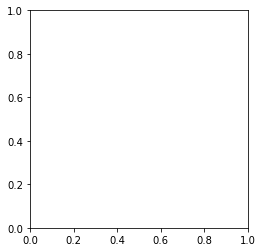

In [60]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 350 * fps)
ret,frame = cap.read()
plt.imshow(frame)

0.8490279316902161

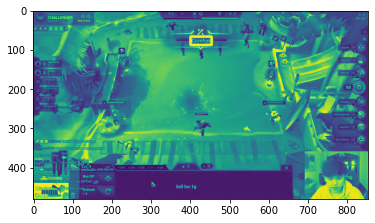

In [54]:
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
matched_img, location, score = pattern_matching(frame_gray, template_bn_resized, methods[1], True)
score

0.7968668937683105

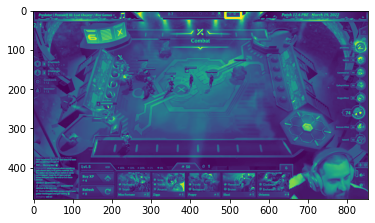

In [271]:
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
matched_img, location, score = pattern_matching(frame_gray, template_resized, methods[1], True)
score